In [1]:
from __future__ import print_function
import pybacktest  # obviously, you should install pybacktest before importing it
import pandas
import matplotlib.pyplot as plt

In [2]:
ohlc = pybacktest.load_from_yahoo('SPY')
ohlc.tail()

,O,H,L,C,V,AC
Date,,,,,,
2016-08-22,218.259995,218.800003,217.830002,218.529999,61368800,218.529999
2016-08-23,219.250000,219.600006,218.899994,218.970001,53399200,218.970001
2016-08-24,218.800003,218.910004,217.360001,217.850006,71728900,217.850006
2016-08-25,217.399994,218.190002,217.220001,217.699997,69224800,217.699997
2016-08-26,217.919998,219.119995,216.250000,217.289993,118763000,217.289993


In [3]:
short_ma = 50
long_ma = 200

ms = ohlc.C.rolling(window=short_ma, center=False).mean()
ml= ohlc.C.rolling(window=long_ma, center=False).mean()
    
buy = cover = (ms > ml) & (ms.shift() < ml.shift())  # ma cross up
sell = short = (ms < ml) & (ms.shift() > ml.shift())  # ma cross down

print('>  Short MA\n%s\n' % ms.tail())
print('>  Long MA\n%s\n' % ml.tail())
print('>  Buy/Cover signals\n%s\n' % buy.tail())
print('>  Short/Sell signals\n%s\n' % sell.tail())

AttributeError: 'Series' object has no attribute 'rolling'

In [6]:
bt = pybacktest.Backtest(locals(), 'ma_cross')

In [7]:
print(filter(lambda x: not x.startswith('_'), dir(bt)))
print('\n>  bt.signals\n%s' % bt.signals.tail())
print('\n>  bt.trades\n%s' % bt.trades.tail())
print('\n>  bt.positions\n%s' % bt.positions.tail())
print('\n>  bt.equity\n%s' % bt.equity.tail())
print('\n>  bt.trade_price\n%s' % bt.trade_price.tail())

['dataobj', 'default_price', 'eqplot', 'equity', 'name', 'ohlc', 'plot_equity', 'plot_trades', 'positions', 'prices', 'report', 'run_time', 'signals', 'sigplot', 'stats', 'summary', 'trade_price', 'trades', 'trdplot']

>  bt.signals
              Buy  Cover   Sell  Short
Date                                  
2016-08-22  False  False  False  False
2016-08-23  False  False  False  False
2016-08-24  False  False  False  False
2016-08-25  False  False  False  False
2016-08-26  False  False  False  False

>  bt.trades
            pos       price  vol
Date                            
2012-02-01  1.0  132.289993  2.0
2015-08-31 -1.0  198.110001 -2.0
2015-12-18  1.0  202.770004  2.0
2016-01-12 -1.0  193.820007 -2.0
2016-04-26  1.0  209.039993  2.0

>  bt.positions
Date
2012-01-31    1.0
2015-08-28   -1.0
2015-12-17    1.0
2016-01-11   -1.0
2016-04-25    1.0
dtype: float64

>  bt.equity
Date
2012-02-01   -13.099991
2015-08-31    65.820008
2015-12-18    -4.660003
2016-01-12    -8.949997
2016-04

In [8]:
bt.summary()

C:\Python27\lib\site-packages\pybacktest\performance.py:25: FutureWarning: pd.expanding_max is deprecated for Series and will be removed in a future version, replace with 
	Series.expanding(min_periods=1).max()
  maxdd = lambda eqd: (eqd.cumsum() - pandas.expanding_max(eqd.cumsum())).abs().max()
C:\Python27\lib\site-packages\pybacktest\performance.py:45: FutureWarning: pd.expanding_max is deprecated for Series and will be removed in a future version, replace with 
	Series.expanding(min_periods=1).max()
  return (((eq - pandas.expanding_max(eq)) ** 2).sum() / len(eq)) ** 0.5


--------------------------------------------------------------
|  Backtest(ma_cross, 2016-27-08 11:49 China Standard Time)  |
-------------------------------------------------------------- 

backtest:
  days: !!python/long '7894'
  from: '1994-09-15 00:00:00'
  to: '2016-04-26 00:00:00'
  trades: 21
exposure:
  trades/month: 1.05
performance:
  PF: 3.4493
  RF: 7.4277
  averages:
    gain: 27.6343
    loss: -8.8128
    trade: 10.2785
  payoff: 3.1357
  profit: 215.8488
  winrate: 0.5238
risk/return profile:
  MPI: 0.9525
  UPI: 0.9072
  WCDD (monte-carlo 0.99 quantile): 69.0466
  maxdd: 29.06
  sharpe: 0.4011
  sortino: 1.7966

--------------------------------------------------------------


C:\Python27\lib\site-packages\pybacktest\performance.py:57: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  return eqd.resample('M', how='sum').mean() / ulcer(eqd)


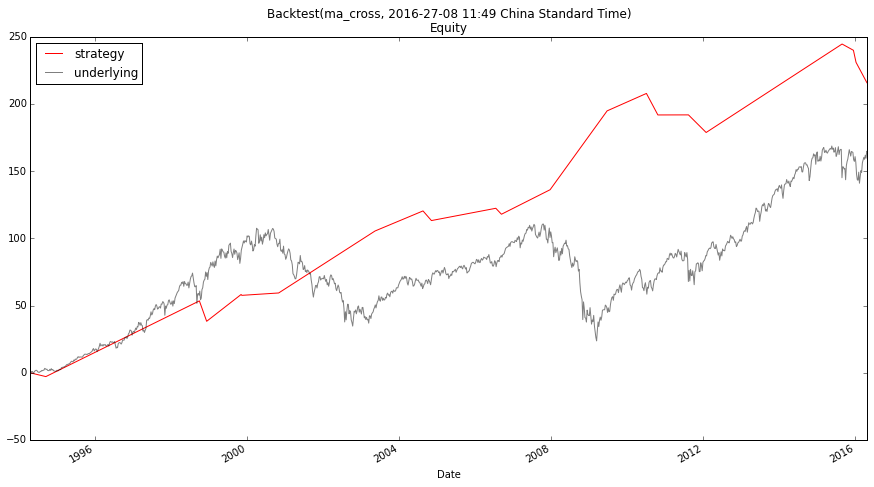

In [15]:
%matplotlib inline
plt.rcParams.update({'figure.figsize': (15, 8)})
bt.plot_equity()

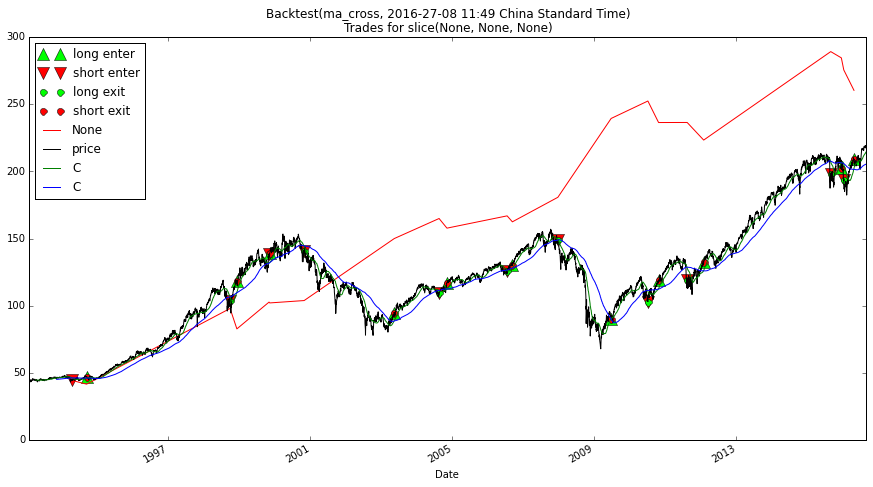

In [16]:
bt.plot_trades()
ohlc.C.rolling(window=short_ma, center=False).mean().plot(c='green')
ohlc.C.rolling(window=long_ma, center=False).mean().plot(c='blue')
plt.legend(loc='upper left')

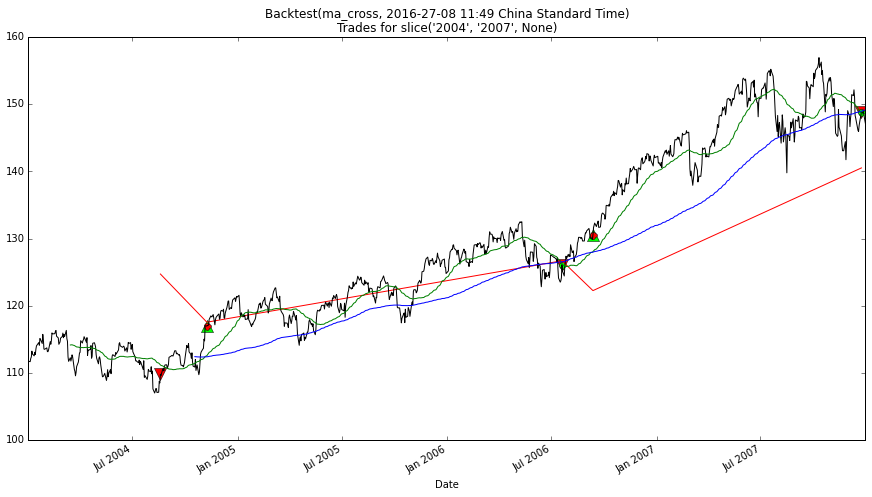

In [17]:
bt.trdplot['2004':'2007']
ohlc.C['2004':'2007'].rolling(window=short_ma, center=False).mean().plot(c='green')
ohlc.C['2004':'2007'].rolling(window=long_ma, center=False).mean().plot(c='blue')